In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

notebook_path = os.getcwd()
project_root = os.path.dirname(notebook_path)
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"O caminho '{project_root}' foi adicionado ao sys.path.")

try:
    from src.preprocessing import apply_msc, apply_savitzky_golay, apply_zscore
    print("OK Código")
except ImportError as e:
    print(f"Erro: {e}")

print("OK Bibliotecas")

O caminho '/Users/arthurogomes/Documents/IC PUCGO/Code' foi adicionado ao sys.path.
OK Código
OK Bibliotecas


In [2]:
silver_path = os.path.join(project_root, 'data', 'silver level', 'rois_extraidos')
PATH_PIXELS_ROI = os.path.join(silver_path, 'pixels_roi_cortados.npy')
PATH_WAVELENGTHS = os.path.join(silver_path, 'wavelengths_cortados.npy')

gold_path = os.path.join(project_root, 'data', 'gold level', 'features')
os.makedirs(gold_path, exist_ok=True)
PATH_FEATURES_PROCESSADAS = os.path.join(gold_path, 'features_msc_sg1_zscore.csv') 

In [3]:
try:
    X_silver = np.load(PATH_PIXELS_ROI)
    wavelengths = np.load(PATH_WAVELENGTHS)
    X_silver = X_silver.astype(np.float64)
    
    print(f"Dados (X_silver) carregados com shape: {X_silver.shape}")
    print(f"Comprimentos de onda carregados com shape: {wavelengths.shape}")
except FileNotFoundError:
    print(f"ERRO: Arquivos não encontrados em {silver_path}")

Dados (X_silver) carregados com shape: (21101, 226)
Comprimentos de onda carregados com shape: (226,)


Plotando 1/3: Assinatura espectral ANTES (Nível Silver)...


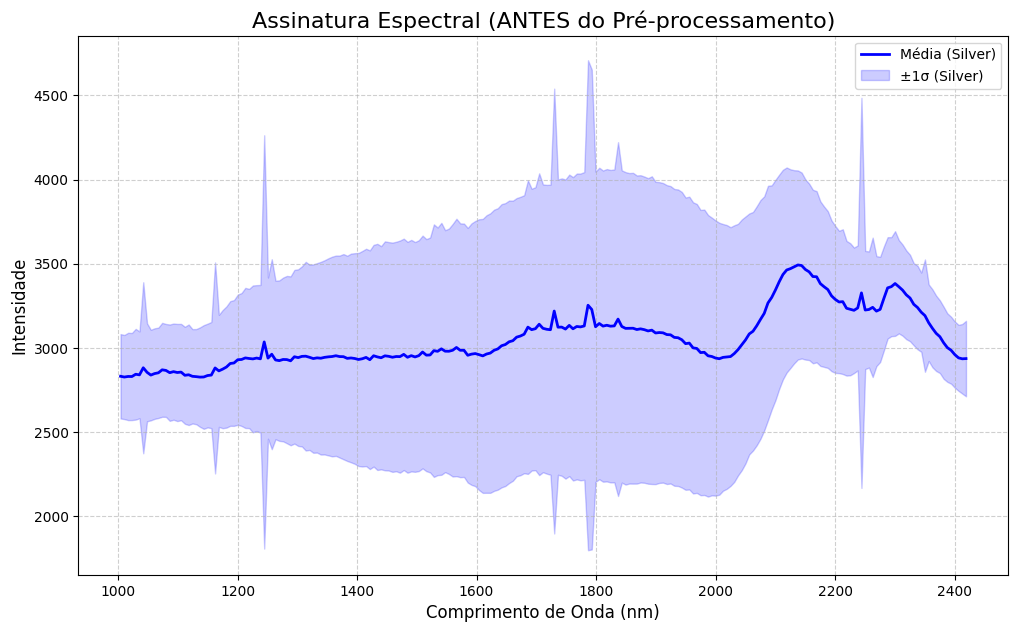

In [4]:
print("Plotando 1/3: Assinatura espectral ANTES (Nível Silver)...")
mean_spectrum_silver = np.mean(X_silver, axis=0)
std_spectrum_silver = np.std(X_silver, axis=0)

plt.figure(figsize=(12, 7))
plt.plot(wavelengths, mean_spectrum_silver, label='Média (Silver)', color='blue', linewidth=2)
plt.fill_between(wavelengths, mean_spectrum_silver - std_spectrum_silver, mean_spectrum_silver + std_spectrum_silver, color='blue', alpha=0.2, label='±1σ (Silver)')
plt.title('Assinatura Espectral (ANTES do Pré-processamento)', fontsize=16)
plt.xlabel('Comprimento de Onda (nm)', fontsize=12)
plt.ylabel('Intensidade', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [5]:
print("Aplicando Etapa 1: Multiplicative Scatter Correction (MSC)...")
X_msc = apply_msc(X_silver)
print("MSC aplicado.")

Aplicando Etapa 1: Multiplicative Scatter Correction (MSC)...
MSC aplicado.


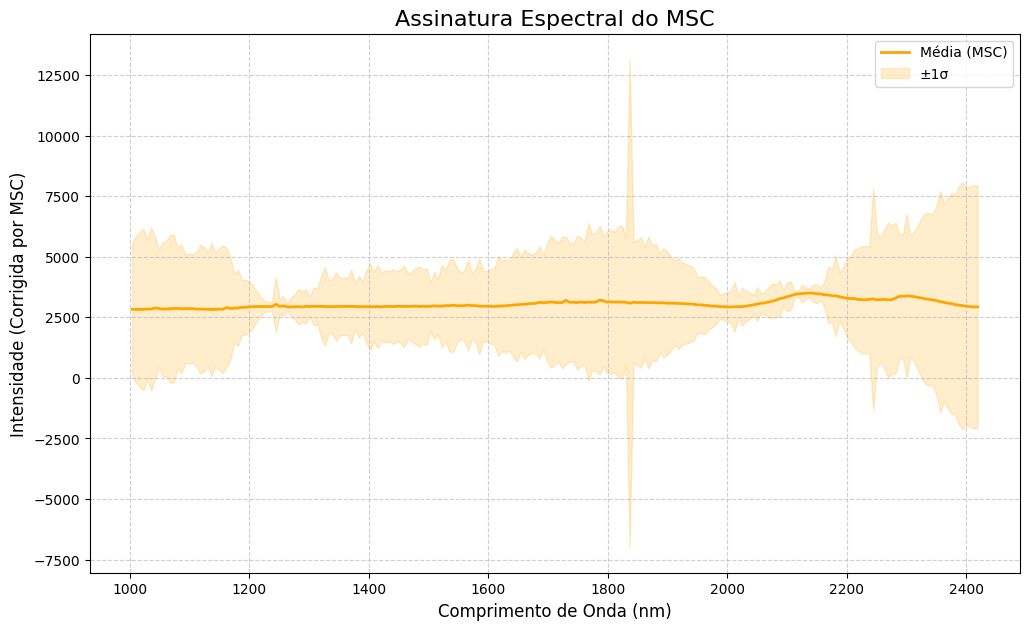

In [6]:
mean_spectrum_msc = np.mean(X_msc, axis=0)
std_spectrum_msc = np.std(X_msc, axis=0)

plt.figure(figsize=(12, 7))
plt.plot(wavelengths, mean_spectrum_msc, label='Média (MSC)', color='orange', linewidth=2)
plt.fill_between(wavelengths, mean_spectrum_msc - std_spectrum_msc, mean_spectrum_msc + std_spectrum_msc, color='orange', alpha=0.2, label='±1σ')
plt.title('Assinatura Espectral do MSC', fontsize=16)
plt.xlabel('Comprimento de Onda (nm)', fontsize=12)
plt.ylabel('Intensidade (Corrigida por MSC)', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [7]:
X_sg = apply_savitzky_golay(
    X_msc, 
    window_size=11,
    poly_order=2,
    deriv_order=1
)
print("Savitzky-Golay aplicado.")

Savitzky-Golay aplicado.


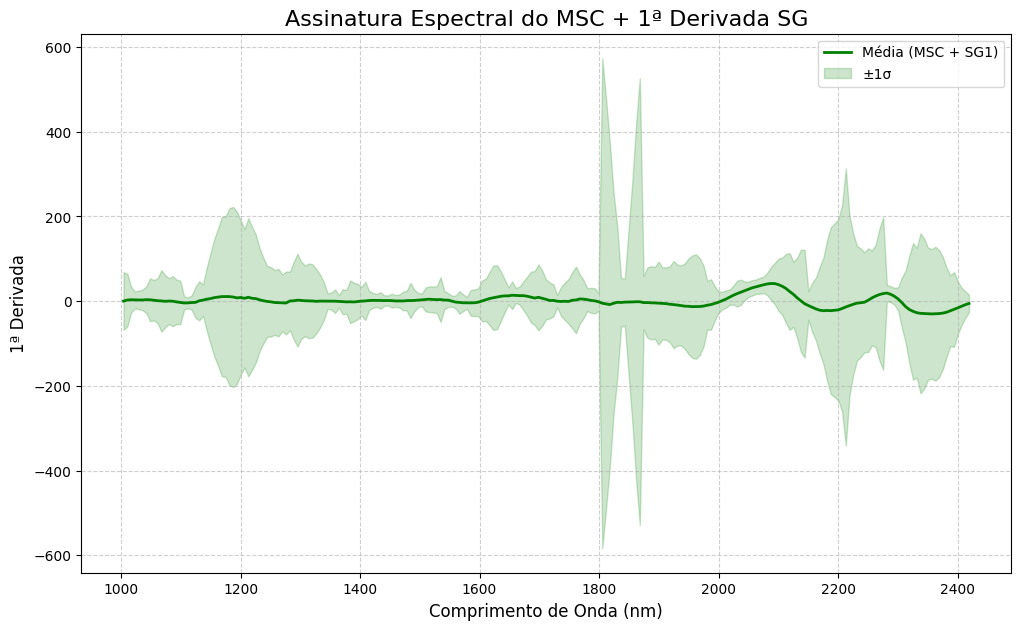

In [8]:
mean_spectrum_sg = np.mean(X_sg, axis=0)
std_spectrum_sg = np.std(X_sg, axis=0)

plt.figure(figsize=(12, 7))
plt.plot(wavelengths, mean_spectrum_sg, label='Média (MSC + SG1)', color='green', linewidth=2)
plt.fill_between(wavelengths, mean_spectrum_sg - std_spectrum_sg, mean_spectrum_sg + std_spectrum_sg, color='green', alpha=0.2, label='±1σ')
plt.title('Assinatura Espectral do MSC + 1ª Derivada SG', fontsize=16)
plt.xlabel('Comprimento de Onda (nm)', fontsize=12)
plt.ylabel('1ª Derivada', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [9]:
print("Aplicando Etapa 3: Normalização Z-Score (StandardScaler)...")

X_gold = apply_zscore(X_sg)
print("Pipeline concluído.")
print(f"Shape dos dados finais (X_gold): {X_gold.shape}")

Aplicando Etapa 3: Normalização Z-Score (StandardScaler)...
Pipeline concluído.
Shape dos dados finais (X_gold): (21101, 226)


Plotando 4/4: Assinatura espectral DEPOIS do Z-Score (Nível Gold)...


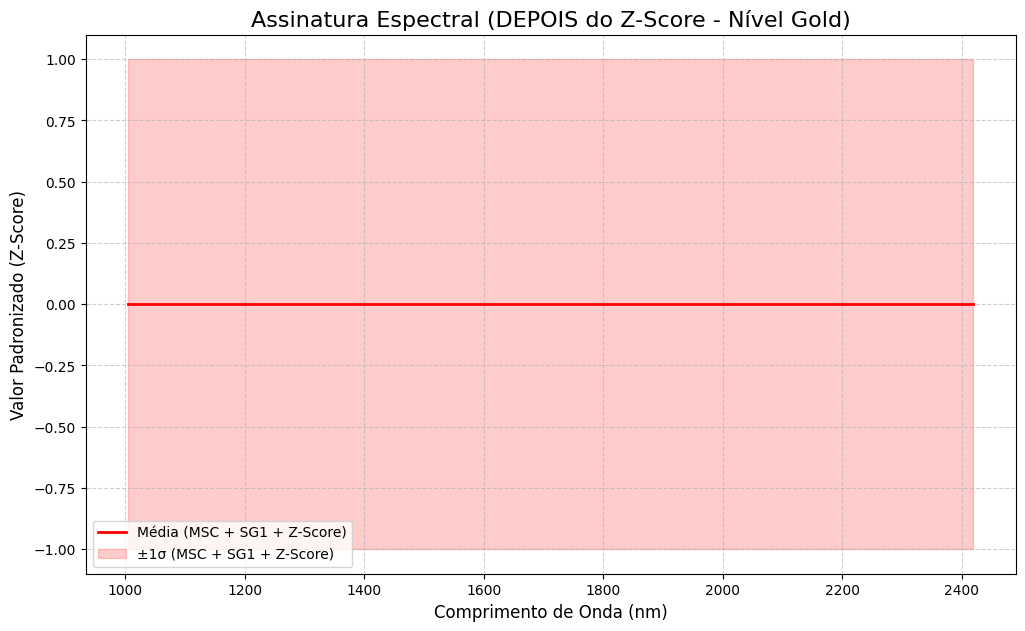

In [10]:
print("Plotando 4/4: Assinatura espectral DEPOIS do Z-Score (Nível Gold)...")
mean_spectrum_gold = np.mean(X_gold, axis=0)
std_spectrum_gold = np.std(X_gold, axis=0)

plt.figure(figsize=(12, 7))
plt.plot(wavelengths, mean_spectrum_gold, label='Média (MSC + SG1 + Z-Score)', color='red', linewidth=2)
plt.fill_between(wavelengths, mean_spectrum_gold - std_spectrum_gold, mean_spectrum_gold + std_spectrum_gold, color='red', alpha=0.2, label='±1σ (MSC + SG1 + Z-Score)')
plt.title('Assinatura Espectral (DEPOIS do Z-Score - Nível Gold)', fontsize=16)
plt.xlabel('Comprimento de Onda (nm)', fontsize=12)
plt.ylabel('Valor Padronizado (Z-Score)', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [11]:
gold_df = pd.DataFrame(X_gold, columns=wavelengths)
gold_df.to_csv(PATH_FEATURES_PROCESSADAS, index=False)

print(f"Features processadas (Nível Gold) salvas em: {PATH_FEATURES_PROCESSADAS}")

Features processadas (Nível Gold) salvas em: /Users/arthurogomes/Documents/IC PUCGO/Code/data/gold level/features/features_msc_sg1_zscore.csv


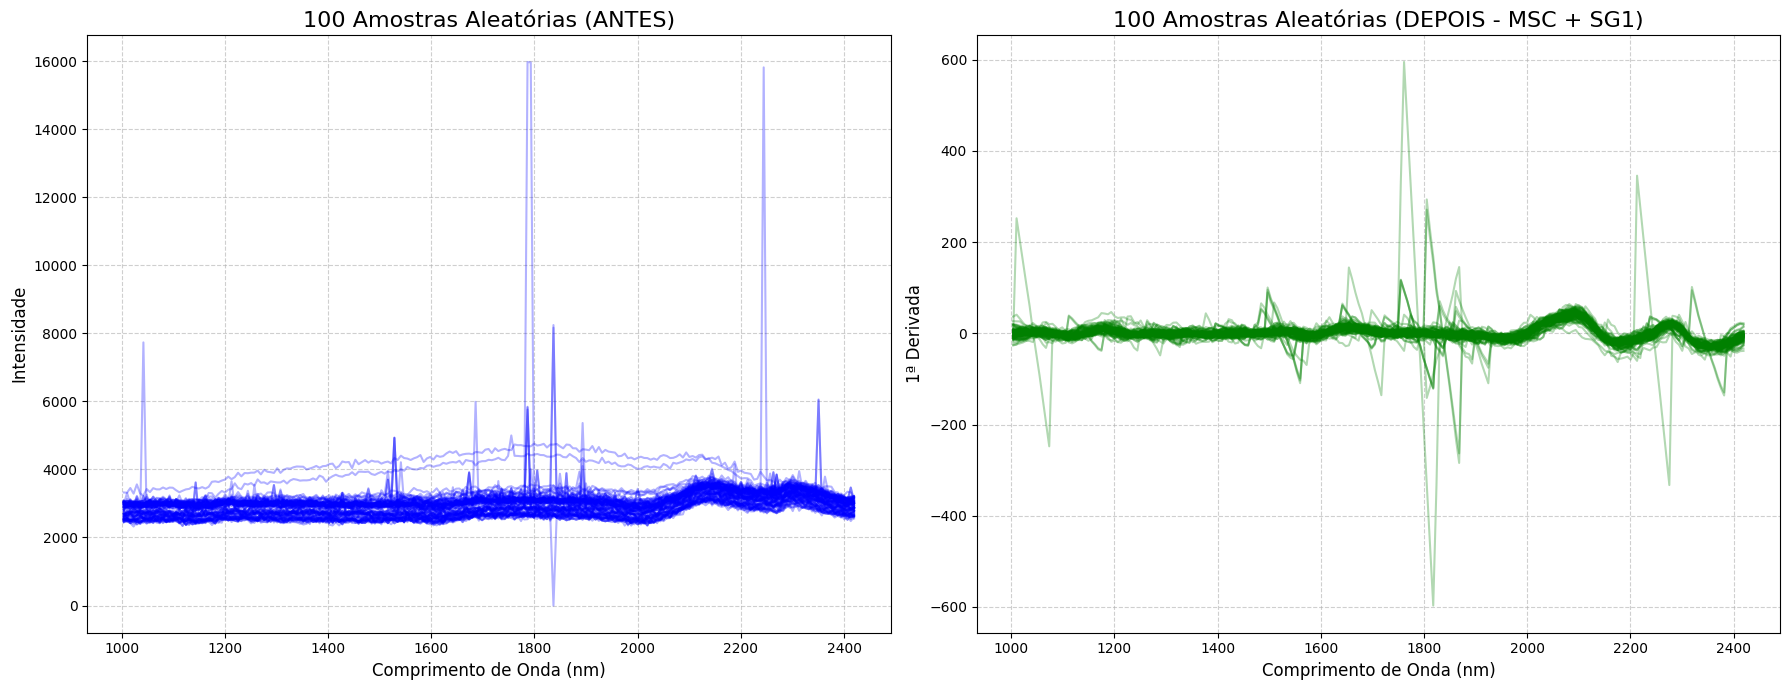

In [12]:
n_samples = 100

# Seleciona 'n_samples' índices aleatórios
rng = np.random.default_rng(seed=42)
indices = rng.choice(X_silver.shape[0], size=n_samples, replace=False)

# Cria os plots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=False) 

axes[0].plot(wavelengths, X_silver[indices, :].T, color='blue', alpha=0.3)
axes[0].set_title(f'{n_samples} Amostras Aleatórias (ANTES)', fontsize=16)
axes[0].set_xlabel('Comprimento de Onda (nm)', fontsize=12)
axes[0].set_ylabel('Intensidade', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Usamos a variável X_sg (que vem antes do Z-Score)
axes[1].plot(wavelengths, X_sg[indices, :].T, color='green', alpha=0.3)
axes[1].set_title(f'{n_samples} Amostras Aleatórias (DEPOIS - MSC + SG1)', fontsize=16)
axes[1].set_xlabel('Comprimento de Onda (nm)', fontsize=12)
axes[1].set_ylabel('1ª Derivada', fontsize=12) 
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()